# DATA 620 - Assignment 5

Jeremy OBrien, Mael Illien, Vanita Thompson

* Choose a corpus of interest. 
* How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way). 
* Taking the most common words, how many unique words represent half of the total words in the corpus
* Identify the 200 highest frequency words in this corpus. 
* Create a graph that shows the relative frequency of these 200 words. 
* Does the observed relative frequency of these words follow Zipf’s law? Explain.  
* In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”  



## Setup

In [1]:
import pandas as pd
import nltk, re, pprint
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords

## Data Import

We start by importing a corpora and taking a look at the data. Note that the raw text contains the entire book, include title and author information.

In [2]:
path = nltk.data.find('corpora/gutenberg/melville-moby_dick.txt')
raw = open(path, 'r').read()

In [3]:
# Need to identify the start of the text
#raw

## Data Exploration and Analysis

We break down the raw text into tokens and filter out the punctuation in order to get the actual words.

In [4]:
tokens = word_tokenize(raw)
len(tokens)
text = nltk.Text(tokens)
print('The text contains {} tokens.'.format(len(tokens)))

The text contains 255038 tokens.


In [5]:
# Extract only the words and set convert every word to lower case
words = [w.lower() for w in tokens if w.isalpha()] 
print('There are {} word tokens. '.format(len(words)))

There are 210326 word tokens. 


### Unique words

To find the unique words, we can turn the list of words into a set in order to use the property that sets have no repeated elements.

Define the choice of unique words further. Consider stemming.

In [6]:
# Consider stemming (see justification in prompt)
#porter = nltk.PorterStemmer()
#lancaster = nltk.LancasterStemmer()
#[porter.stem(t) for t in tokens]
vocab = sorted(set(words))
print('There are {} unique words.'.format(len(vocab)))

There are 16510 unique words.


### Frequency distribution

The NLTK function FreqDist returns the most common words in the corpus along with the number of occurences

In [7]:
fdist = nltk.FreqDist(words)
most_common = fdist.most_common(200)
most_common[:5]

[('the', 14422), ('of', 6586), ('and', 6414), ('a', 4698), ('to', 4597)]

### Zipf's Law

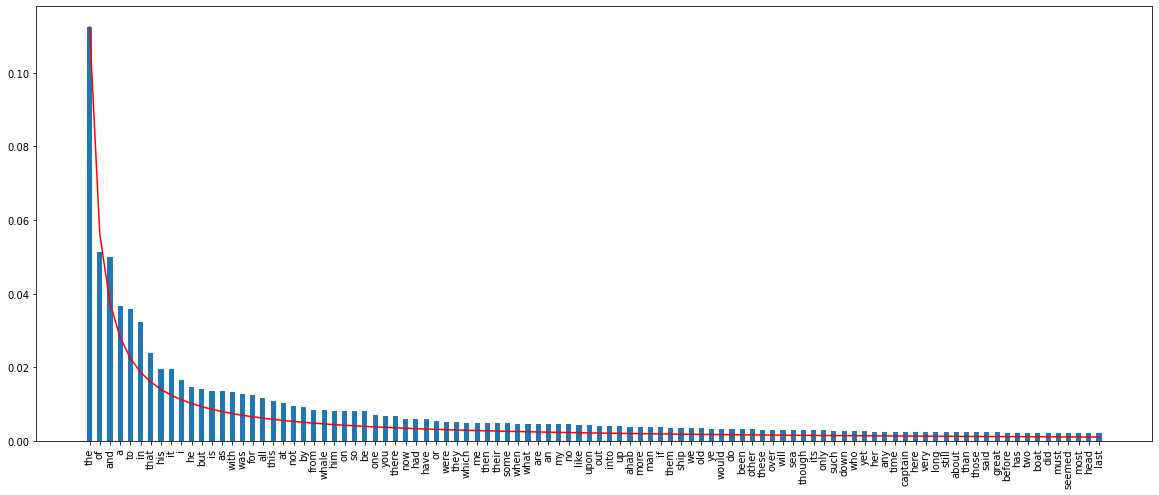

In [8]:
plt.rcParams["figure.figsize"] = (16,8)
wrds = [w[0] for w in most_common]
freq = [w[1] for w in most_common]
weights = [f/sum(freq) for f in freq]
zipf = [weights[0]/n for n in range(1,200)]

plt.rcParams["figure.figsize"] = (20,8)
plt.bar(wrds[:100], weights[:100], width=0.5)
plt.plot(zipf[:100], color='r')
plt.xticks(rotation=90)
plt.show()

Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n.

Elaborate on this

### Particularities of the corpus

We remove common words "stop words" in order to look at the words particular to this text. What we observe is that the frequency of these words differ from other corpora as this distribution appears to be related to the sea and a nautical theme, which makes sense given the title of the book. In the top 20 we find wale, sea, ship and captain.

In [9]:
stop_words = stopwords.words('english')
filtered_words = [w for w in words if not w in stop_words]
fdist_filtered = nltk.FreqDist(filtered_words)
most_common_filtered = fdist_filtered.most_common(200)
most_common_filtered[:5]

[('whale', 1086), ('one', 912), ('like', 580), ('upon', 565), ('ahab', 508)]

In [10]:
unzip = [[ i for i, j in most_common_filtered ], 
       [ j for i, j in most_common_filtered ]] 

common_words_df = pd.DataFrame({'word': unzip[0], 'frequency': unzip[1]})

common_words_df[:20]

,word,frequency
0,whale,1086
1,one,912
2,like,580
3,upon,565
4,ahab,508
5,man,490
6,ship,463
7,old,443
8,ye,438
9,would,435


## Conclusion

## Youtube